<a href="https://colab.research.google.com/github/derindidinedin/crime/blob/main/4%20Invent_Analytics_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Invent Analytis Promotion Bump Assignment

I have coded using the Python programming language on Google Colab.

## Data Cleaning and Preparation

I have uploaded the data files onto Google Colab from Google Drive.

In [ ]:
#Connecting the Google Colab file to my Google Drive account.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing the relevant libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
#Loading all of the datasets
sales_data = pd.read_csv('/assignment4.1a.csv')
additional_sales_data = pd.read_csv('/assignment4.1b.csv')
product_categories = pd.read_csv('/assignment4.1c.csv')
promotion_dates = pd.read_csv('/PromotionDates.csv')

In [ ]:
# Displaying the first few rows of each dataset
print("Sales Data:")
display(sales_data.head())

print("\nPromotion Dates:")
display(promotion_dates.head())

print("\nAdditional Sales Data:")
display(additional_sales_data.head())

print("\nProduct Categories:")
display(product_categories.head())

Sales Data:


,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8,9,-1
1,2015-01-01,131,9,1
2,2015-01-01,144,9,2
3,2015-01-01,203,9,2
4,2015-01-01,256,9,0



Promotion Dates:


,Period,StartDate,EndDate
0,Promo1,2/10/2015,2/17/2015
1,Promo2,3/15/2015,3/22/2015
2,Promo3,5/24/2015,6/1/2015
3,Promo4,6/21/2015,6/28/2015
4,Promo5,1/9/2015,6/9/2015



Additional Sales Data:


,Date,StoreCode,ProductCode,SalesQuantity
0,2015-08-01,2,9,1
1,2015-08-01,7,9,1
2,2015-08-01,62,9,1
3,2015-08-01,181,9,1
4,2015-08-01,6,20,1



Product Categories:


,ProductCode,ProductGroup1,ProductGroup2
0,1,A,5
1,2,A,5
2,3,A,5
3,4,A,5
4,5,A,5


In [ ]:
#Defining the file paths for the data sets to run the summary statistics function
file_paths = {
    'sales_data': '/assignment4.1a.csv',
    'additional_sales_data': '/assignment4.1b.csv',
    'product_categories': '/assignment4.1c.csv',
    'promotion_dates': '/PromotionDates.csv'
}

dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Displaying the summary statistics for each dataset
for name, df in dataframes.items():
    print(f"\nSummary statistics for {name} before cleaning:\n")
    display(df.describe())


Summary statistics for sales_data before cleaning:



,StoreCode,ProductCode,SalesQuantity
count,504587.000000,504587.000000,504586.000000
mean,171.346844,66.364528,1.028459
std,101.864878,38.093748,1.954577
min,1.000000,1.000000,-33.000000
25%,80.000000,39.000000,0.000000
50%,171.000000,60.000000,1.000000
75%,265.000000,91.000000,1.000000
max,340.000000,186.000000,108.000000



Summary statistics for additional_sales_data before cleaning:



,StoreCode,ProductCode,SalesQuantity
count,488902.000000,488901.000000,488901.000000
mean,169.876865,161.674269,2.120403
std,100.664461,79.865330,4.754410
min,1.000000,1.000000,-40.000000
25%,82.000000,95.000000,0.000000
50%,167.000000,168.000000,1.000000
75%,262.000000,218.000000,2.000000
max,340.000000,317.000000,276.000000



Summary statistics for product_categories before cleaning:



,ProductCode,ProductGroup2
count,317.000000,317.000000
mean,159.000000,13.921136
std,91.654242,9.063250
min,1.000000,1.000000
25%,80.000000,5.000000
50%,159.000000,14.000000
75%,238.000000,23.000000
max,317.000000,30.000000



Summary statistics for promotion_dates before cleaning:



,Period,StartDate,EndDate
count,6,6,6
unique,6,6,6
top,Promo1,2/10/2015,2/17/2015
freq,1,1,1


In [ ]:
# Converting date columns to datetime
def convert_to_datetime(df, column):
    df[column] = pd.to_datetime(df[column], errors='coerce')
    missing_dates = df[column].isnull().sum()
    if missing_dates > 0:
        print(f"There is {missing_dates} missing date in column {column}.")
    return df

sales_data = convert_to_datetime(sales_data, 'Date')
additional_sales_data = convert_to_datetime(additional_sales_data, 'Date')
promotion_dates = convert_to_datetime(promotion_dates, 'StartDate')
promotion_dates = convert_to_datetime(promotion_dates, 'EndDate')

# Checking for missing values
print("Missing values in sales data:\n", sales_data.isnull().sum())
print("\nMissing values in additional sales data:\n", additional_sales_data.isnull().sum())
print("\nMissing values in promotion dates:\n", promotion_dates.isnull().sum())
print("\nMissing values in product categories:\n", product_categories.isnull().sum())

# Removing duplicates
for name, df in dataframes.items():
    df.drop_duplicates(inplace=True)

# Removing missing values from each dataset
for name, df in dataframes.items():
    dataframes[name] = df.dropna()
    print(f"\nAfter removing missing values, missing values in {name}:\n", dataframes[name].isnull().sum())

# Displaying summary statistics after removing missing values
for name, df in dataframes.items():
    print(f"\nSummary statistics for {name} after removing missing values:\n")
    display(df.describe())

# Displaying the first few rows of the cleaned data
display(sales_data.head())
display(additional_sales_data.head())
display(promotion_dates.head())
display(product_categories.head())

There is 1 missing date in column StartDate.
There is 1 missing date in column EndDate.
Missing values in sales data:
 Date             0
StoreCode        1
ProductCode      1
SalesQuantity    1
dtype: int64

Missing values in additional sales data:
 Date             0
StoreCode        0
ProductCode      0
SalesQuantity    0
dtype: int64

Missing values in promotion dates:
 Period       0
StartDate    1
EndDate      1
dtype: int64

Missing values in product categories:
 ProductCode      0
ProductGroup1    0
ProductGroup2    0
dtype: int64

After removing missing values, missing values in sales_data:
 Date             0
StoreCode        0
ProductCode      0
SalesQuantity    0
dtype: int64

After removing missing values, missing values in additional_sales_data:
 Date             0
StoreCode        0
ProductCode      0
SalesQuantity    0
dtype: int64

After removing missing values, missing values in product_categories:
 ProductCode      0
ProductGroup1    0
ProductGroup2    0
dtype: int64

,StoreCode,ProductCode,SalesQuantity
count,504586.000000,504586.000000,504586.000000
mean,171.346845,66.364291,1.028459
std,101.864979,38.093414,1.954577
min,1.000000,1.000000,-33.000000
25%,80.000000,39.000000,0.000000
50%,171.000000,60.000000,1.000000
75%,265.000000,91.000000,1.000000
max,340.000000,186.000000,108.000000



Summary statistics for additional_sales_data after removing missing values:



,StoreCode,ProductCode,SalesQuantity
count,488901.000000,488901.000000,488901.000000
mean,169.877188,161.674269,2.120403
std,100.664310,79.865330,4.754410
min,1.000000,1.000000,-40.000000
25%,82.000000,95.000000,0.000000
50%,167.000000,168.000000,1.000000
75%,262.000000,218.000000,2.000000
max,340.000000,317.000000,276.000000



Summary statistics for product_categories after removing missing values:



,ProductCode,ProductGroup2
count,317.000000,317.000000
mean,159.000000,13.921136
std,91.654242,9.063250
min,1.000000,1.000000
25%,80.000000,5.000000
50%,159.000000,14.000000
75%,238.000000,23.000000
max,317.000000,30.000000



Summary statistics for promotion_dates after removing missing values:



,Period,StartDate,EndDate
count,6,6,6
unique,6,6,6
top,Promo1,2/10/2015,2/17/2015
freq,1,1,1


,Date,StoreCode,ProductCode,SalesQuantity
0,2015-01-01,8.0,9.0,-1.0
1,2015-01-01,131.0,9.0,1.0
2,2015-01-01,144.0,9.0,2.0
3,2015-01-01,203.0,9.0,2.0
4,2015-01-01,256.0,9.0,0.0


,Date,StoreCode,ProductCode,SalesQuantity
0,2015-08-01,2,9,1
1,2015-08-01,7,9,1
2,2015-08-01,62,9,1
3,2015-08-01,181,9,1
4,2015-08-01,6,20,1


,Period,StartDate,EndDate
0,Promo1,2015-02-10,2015-02-17
1,Promo2,2015-03-15,2015-03-22
2,Promo3,2015-05-24,2015-06-01
3,Promo4,2015-06-21,2015-06-28
4,Promo5,2015-01-09,2015-06-09


,ProductCode,ProductGroup1,ProductGroup2
0,1,A,5
1,2,A,5
2,3,A,5
3,4,A,5
4,5,A,5


In [ ]:
import pandas as pd

# Convert date columns to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')
promotion_dates['StartDate'] = pd.to_datetime(promotion_dates['StartDate'], errors='coerce')
promotion_dates['EndDate'] = pd.to_datetime(promotion_dates['EndDate'], errors='coerce')

# Check for any parsing issues
print("Sales Data Date Conversion Issues:\n", sales_data[sales_data['Date'].isnull()])
print("Promotion Dates StartDate Conversion Issues:\n", promotion_dates[promotion_dates['StartDate'].isnull()])
print("Promotion Dates EndDate Conversion Issues:\n", promotion_dates[promotion_dates['EndDate'].isnull()])

# Drop rows with invalid dates if any
sales_data = sales_data.dropna(subset=['Date'])
promotion_dates = promotion_dates.dropna(subset=['StartDate', 'EndDate'])

# Initialize the promotional flag column with 0
sales_data['PromotionalFlag'] = 0

# Loop through each promotion period and set the flag
for i, promo in promotion_dates.iterrows():
    promo_period = (sales_data['Date'] >= promo['StartDate']) & (sales_data['Date'] <= promo['EndDate'])
    # Assign 1 for the first four promotions and 2 for the last two promotions
    if i < 5:
        sales_data.loc[promo_period, 'PromotionalFlag'] = 1
    else:
        sales_data.loc[promo_period, 'PromotionalFlag'] = 2

# Display the first few rows to verify
print(sales_data.head())

# Save the modified dataframe to a new CSV file
sales_data.to_csv('/assignment4.1a_with_promotional_flag.csv', index=False)

Sales Data Date Conversion Issues:
 Empty DataFrame
Columns: [Date, StoreCode, ProductCode, SalesQuantity, PromotionalFlag, Week]
Index: []
Promotion Dates StartDate Conversion Issues:
 Empty DataFrame
Columns: [Period, StartDate, EndDate]
Index: []
Promotion Dates EndDate Conversion Issues:
 Empty DataFrame
Columns: [Period, StartDate, EndDate]
Index: []
        Date  StoreCode  ProductCode  SalesQuantity  PromotionalFlag  Week
0 2015-01-01        8.0          9.0           -1.0                0     1
1 2015-01-01      131.0          9.0            1.0                0     1
2 2015-01-01      144.0          9.0            2.0                0     1
3 2015-01-01      203.0          9.0            2.0                0     1
4 2015-01-01      256.0          9.0            0.0                0     1


## Categorising the Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset with promotional flags

# Convert date column to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')

# Create weekly sales aggregation
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week
weekly_sales = sales_data.groupby(['ProductCode', 'StoreCode', 'Week', 'PromotionalFlag'])['SalesQuantity'].sum().reset_index()

# Separate the data into promotional (flag = 1) and non-promotional periods (flag = 0)
non_promo_sales = weekly_sales[weekly_sales['PromotionalFlag'] == 0]
promo_sales = weekly_sales[weekly_sales['PromotionalFlag'] == 1]

# Calculate the average weekly sales for non-promotion periods
avg_weekly_non_promo_sales = non_promo_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()
avg_weekly_non_promo_sales.columns = ['ProductCode', 'StoreCode', 'AvgNonPromoSales']

# Calculate the average weekly sales for promotion periods (flag = 1)
avg_weekly_promo_sales = promo_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()
avg_weekly_promo_sales.columns = ['ProductCode', 'StoreCode', 'AvgPromoSales']

# Merge the average sales data
avg_sales = avg_weekly_non_promo_sales.merge(avg_weekly_promo_sales, on=['ProductCode', 'StoreCode'], how='left')

# Replace NaN values with 0 for promo sales (since there might be StoreProductCodes that don't have sales in promotion period)
avg_sales['AvgPromoSales'] = avg_sales['AvgPromoSales'].fillna(0)

# Calculate the effect of promotion in percentage form, handling division by zero
avg_sales['SalesIncreasePercentage'] = np.where(
    avg_sales['AvgNonPromoSales'] > 0,
    ((avg_sales['AvgPromoSales'] - avg_sales['AvgNonPromoSales']) / avg_sales['AvgNonPromoSales']) * 100,
    0
)

# Ensure reproducibility by setting the random state and increasing n_init for KMeans
random_state = 42
n_init = 1000  # Increased n_init to further stabilize clustering results

# Cluster products based on average weekly sales during non-promotion periods
product_avg_sales = avg_sales.groupby('ProductCode')['AvgNonPromoSales'].mean().reset_index()
kmeans_product = KMeans(n_clusters=3, random_state=random_state, n_init=n_init)
product_avg_sales['Cluster'] = kmeans_product.fit_predict(product_avg_sales[['AvgNonPromoSales']])
product_avg_sales['Cluster'] = product_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

# Cluster stores based on average weekly sales during non-promotion periods
store_avg_sales = avg_sales.groupby('StoreCode')['AvgNonPromoSales'].mean().reset_index()
kmeans_store = KMeans(n_clusters=3, random_state=random_state, n_init=n_init)
store_avg_sales['Cluster'] = kmeans_store.fit_predict(store_avg_sales[['AvgNonPromoSales']])
store_avg_sales['Cluster'] = store_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

# Merge cluster information back into avg_sales
avg_sales = avg_sales.merge(product_avg_sales[['ProductCode', 'Cluster']], on='ProductCode', how='left')
avg_sales.rename(columns={'Cluster': 'Cluster_Product'}, inplace=True)
avg_sales = avg_sales.merge(store_avg_sales[['StoreCode', 'Cluster']], on='StoreCode', how='left')
avg_sales.rename(columns={'Cluster': 'Cluster_Store'}, inplace=True)

# Calculate sales increase by product and store clusters
product_cluster_effect = avg_sales.groupby('Cluster_Product')['SalesIncreasePercentage'].mean()
store_cluster_effect = avg_sales.groupby('Cluster_Store')['SalesIncreasePercentage'].mean()

print("Sales Increase Percentage by Product Cluster:")
print(product_cluster_effect)

print("\nSales Increase Percentage by Store Cluster:")
print(store_cluster_effect)

# Display the clusters
print(product_avg_sales.head())
print(store_avg_sales.head())

Sales Increase Percentage by Product Cluster:
Cluster_Product
Fast      23.391506
Medium    52.963585
Slow      80.689330
Name: SalesIncreasePercentage, dtype: float64

Sales Increase Percentage by Store Cluster:
Cluster_Store
Fast      34.955723
Medium    35.328267
Slow      34.673696
Name: SalesIncreasePercentage, dtype: float64
   ProductCode  AvgNonPromoSales Cluster
0          1.0          2.642734    Fast
1          2.0          2.261413    Fast
2          3.0          2.254218    Fast
3          4.0          2.394042    Fast
4          5.0          2.322108    Fast
   StoreCode  AvgNonPromoSales Cluster
0        1.0          2.638752    Slow
1        2.0          4.997376    Fast
2        3.0          1.871808  Medium
3        4.0          2.342973  Medium
4        5.0          2.267788  Medium


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset with promotional flags
sales_data = pd.read_csv('/assignment4.1a_with_promotional_flag.csv')

# Convert date column to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')

# Create weekly sales aggregation
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week
weekly_sales = sales_data.groupby(['ProductCode', 'StoreCode', 'Week', 'PromotionalFlag'])['SalesQuantity'].sum().reset_index()

# Separate the data into promotional (flag = 1) and non-promotional periods (flag = 0)
non_promo_sales = weekly_sales[weekly_sales['PromotionalFlag'] == 0]
promo_sales = weekly_sales[weekly_sales['PromotionalFlag'] == 1]

# Calculate the average weekly sales for non-promotion periods
avg_weekly_non_promo_sales = non_promo_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()
avg_weekly_non_promo_sales.columns = ['ProductCode', 'StoreCode', 'AvgNonPromoSales']

# Calculate the average weekly sales for promotion periods (flag = 1)
avg_weekly_promo_sales = promo_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()
avg_weekly_promo_sales.columns = ['ProductCode', 'StoreCode', 'AvgPromoSales']

# Merge the average sales data
avg_sales = avg_weekly_non_promo_sales.merge(avg_weekly_promo_sales, on=['ProductCode', 'StoreCode'], how='left')

# Replace NaN values with 0 for promo sales (since there might be StoreProductCodes that don't have sales in promotion period)
avg_sales['AvgPromoSales'] = avg_sales['AvgPromoSales'].fillna(0)

# Calculate the effect of promotion in percentage form, handling division by zero
avg_sales['SalesIncreasePercentage'] = np.where(
    avg_sales['AvgNonPromoSales'] > 0,
    ((avg_sales['AvgPromoSales'] - avg_sales['AvgNonPromoSales']) / avg_sales['AvgNonPromoSales']) * 100,
    0
)

# Cluster products based on average weekly sales during non-promotion periods
product_avg_sales = avg_sales.groupby('ProductCode')['AvgNonPromoSales'].mean().reset_index()
kmeans_product = KMeans(n_clusters=3, random_state=42, n_init=10)
product_avg_sales['Cluster'] = kmeans_product.fit_predict(product_avg_sales[['AvgNonPromoSales']])
product_avg_sales['Cluster'] = product_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

# Cluster stores based on average weekly sales during non-promotion periods
store_avg_sales = avg_sales.groupby('StoreCode')['AvgNonPromoSales'].mean().reset_index()
kmeans_store = KMeans(n_clusters=3, random_state=42, n_init=10)
store_avg_sales['Cluster'] = kmeans_store.fit_predict(store_avg_sales[['AvgNonPromoSales']])
store_avg_sales['Cluster'] = store_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

# Merge cluster information back into avg_sales
avg_sales = avg_sales.merge(product_avg_sales[['ProductCode', 'Cluster']], on='ProductCode', how='left')
avg_sales.rename(columns={'Cluster': 'Cluster_Product'}, inplace=True)
avg_sales = avg_sales.merge(store_avg_sales[['StoreCode', 'Cluster']], on='StoreCode', how='left')
avg_sales.rename(columns={'Cluster': 'Cluster_Store'}, inplace=True)

# Calculate sales increase by product and store clusters
product_cluster_effect = avg_sales.groupby('Cluster_Product')['SalesIncreasePercentage'].mean()
store_cluster_effect = avg_sales.groupby('Cluster_Store')['SalesIncreasePercentage'].mean()

print("Sales Increase Percentage by Product Cluster:")
print(product_cluster_effect)

print("\nSales Increase Percentage by Store Cluster:")
print(store_cluster_effect)

# Display the clusters
print(product_avg_sales.head())
print(store_avg_sales.head())

Sales Increase Percentage by Product Cluster:
Cluster_Product
Fast      145.222785
Medium      4.594537
Slow       30.266059
Name: SalesIncreasePercentage, dtype: float64

Sales Increase Percentage by Store Cluster:
Cluster_Store
Fast      18.934383
Medium    13.683625
Slow      16.602248
Name: SalesIncreasePercentage, dtype: float64
   ProductCode  AvgNonPromoSales Cluster
0          1.0          2.642734    Slow
1          2.0          2.261413    Slow
2          3.0          2.254218    Slow
3          4.0          2.394042    Slow
4          5.0          2.322108    Slow
   StoreCode  AvgNonPromoSales Cluster
0        1.0          1.131583    Slow
1        2.0          2.032602    Fast
2        3.0          1.292684  Medium
3        4.0          1.295630  Medium
4        5.0          1.224256  Medium


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score

# Define the percentage increases observed from flag 0 to flag 1
product_cluster_increase = {
    'Fast': 58.172191,
    'Medium': 26.613605,
    'Slow': 80.918510
}

store_cluster_increase = {
    'Fast': 37.275141,
    'Medium': 35.404604,
    'Slow': 35.350718
}

# Load the historical sales data
historical_sales_data = pd.read_csv('/assignment4.1a.csv')
promotion_dates = pd.read_csv('/PromotionDates.csv')

# Convert date columns to datetime
historical_sales_data['Date'] = pd.to_datetime(historical_sales_data['Date'], errors='coerce')
promotion_dates['StartDate'] = pd.to_datetime(promotion_dates['StartDate'], errors='coerce')
promotion_dates['EndDate'] = pd.to_datetime(promotion_dates['EndDate'], errors='coerce')

# Initialize the promotional flag to 0
historical_sales_data['PromotionalFlag'] = 0

# Set the promotional flag based on the promotion dates
for idx, row in promotion_dates.iterrows():
    promo_period = (historical_sales_data['Date'] >= row['StartDate']) & (historical_sales_data['Date'] <= row['EndDate'])
    historical_sales_data.loc[promo_period, 'PromotionalFlag'] = 1

# Filter data for non-promo periods (flag = 0)
non_promo_sales = historical_sales_data[historical_sales_data['PromotionalFlag'] == 0]

# Aggregate weekly sales
non_promo_sales['Week'] = non_promo_sales['Date'].dt.isocalendar().week
avg_weekly_non_promo_sales = non_promo_sales.groupby(['ProductCode', 'StoreCode', 'Week'])['SalesQuantity'].sum().reset_index()
avg_weekly_non_promo_sales = avg_weekly_non_promo_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()
avg_weekly_non_promo_sales.columns = ['ProductCode', 'StoreCode', 'AvgNonPromoSales']

# Debug: Check the data after aggregation
print("Average weekly non-promo sales:")
print(avg_weekly_non_promo_sales.head())

# Cluster products based on average weekly sales during non-promo periods
product_avg_sales = avg_weekly_non_promo_sales.groupby('ProductCode')['AvgNonPromoSales'].mean().reset_index()
kmeans_product = KMeans(n_clusters=3, random_state=42, n_init=10)
product_avg_sales['Cluster'] = kmeans_product.fit_predict(product_avg_sales[['AvgNonPromoSales']])
product_avg_sales['Cluster'] = product_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

# Debug: Check the product clusters
print("Product clusters:")
print(product_avg_sales.head())

# Cluster stores based on average weekly sales during non-promo periods
store_avg_sales = avg_weekly_non_promo_sales.groupby('StoreCode')['AvgNonPromoSales'].mean().reset_index()
kmeans_store = KMeans(n_clusters=3, random_state=42, n_init=10)
store_avg_sales['Cluster'] = kmeans_store.fit_predict(store_avg_sales[['AvgNonPromoSales']])
store_avg_sales['Cluster'] = store_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

# Debug: Check the store clusters
print("Store clusters:")
print(store_avg_sales.head())

# Merge cluster information back into avg_weekly_non_promo_sales
avg_weekly_non_promo_sales = avg_weekly_non_promo_sales.merge(product_avg_sales[['ProductCode', 'Cluster']], on='ProductCode', how='left')
avg_weekly_non_promo_sales.rename(columns={'Cluster': 'Cluster_Product'}, inplace=True)
avg_weekly_non_promo_sales = avg_weekly_non_promo_sales.merge(store_avg_sales[['StoreCode', 'Cluster']], on='StoreCode', how='left')
avg_weekly_non_promo_sales.rename(columns={'Cluster': 'Cluster_Store'}, inplace=True)

# Debug: Check the merged data with clusters
print("Non-promo sales with clusters:")
print(avg_weekly_non_promo_sales.head())

# Load the new data
new_sales_data = pd.read_csv('/assignment4.1b.csv')
new_sales_data['Date'] = pd.to_datetime(new_sales_data['Date'], errors='coerce')

# Identify the promotion period for Promotion 5 from the provided dates
promo5_start = pd.to_datetime('2015-01-09')
promo5_end = pd.to_datetime('2015-06-09')

# Filter the new data for the Promotion 5 period
promo5_sales = new_sales_data[(new_sales_data['Date'] >= promo5_start) & (new_sales_data['Date'] <= promo5_end)]

# Debug: Check the filtered data for Promotion 5
print("Promotion 5 sales data:")
print(promo5_sales.head())

# Check if promo5_sales is empty
if promo5_sales.empty:
    print("No sales data found for Promotion 5 period in the new sales data.")
else:
    # Aggregate weekly sales for Promotion 5
    promo5_sales['Week'] = promo5_sales['Date'].dt.isocalendar().week
    promo5_avg_sales = promo5_sales.groupby(['ProductCode', 'StoreCode', 'Week'])['SalesQuantity'].sum().reset_index()
    promo5_avg_sales = promo5_avg_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()
    promo5_avg_sales.columns = ['ProductCode', 'StoreCode', 'ActualPromoSales']

    # Merge with non-promo average sales
    promo5_avg_sales = promo5_avg_sales.merge(avg_weekly_non_promo_sales, on=['ProductCode', 'StoreCode'], how='left')

    # Debug: Check the merged data for Promotion 5
    print("Promotion 5 sales with non-promo average sales:")
    print(promo5_avg_sales.head())

    # Calculate the predicted sales for Promotion 5 using the observed percentage increases
    promo5_avg_sales['PredictedSales_Product'] = promo5_avg_sales.apply(lambda row: row['AvgNonPromoSales'] * (1 + product_cluster_increase.get(row['Cluster_Product'], 0) / 100), axis=1)
    promo5_avg_sales['PredictedSales_Store'] = promo5_avg_sales.apply(lambda row: row['AvgNonPromoSales'] * (1 + store_cluster_increase.get(row['Cluster_Store'], 0) / 100), axis=1)

    # Calculate variance between actual and predicted sales
    promo5_avg_sales['Variance_Product'] = promo5_avg_sales['ActualPromoSales'] - promo5_avg_sales['PredictedSales_Product']
    promo5_avg_sales['Variance_Store'] = promo5_avg_sales['ActualPromoSales'] - promo5_avg_sales['PredictedSales_Store']

    # Calculate goodness of fit
    mse_product = mean_squared_error(promo5_avg_sales['ActualPromoSales'], promo5_avg_sales['PredictedSales_Product'])
    mse_store = mean_squared_error(promo5_avg_sales['ActualPromoSales'], promo5_avg_sales['PredictedSales_Store'])
    r2_product = r2_score(promo5_avg_sales['ActualPromoSales'], promo5_avg_sales['PredictedSales_Product'])
    r2_store = r2_score(promo5_avg_sales['ActualPromoSales'], promo5_avg_sales['PredictedSales_Store'])

    print("Mean Squared Error (Product Cluster):", mse_product)
    print("R-squared (Product Cluster):", r2_product)
    print("Mean Squared Error (Store Cluster):", mse_store)
    print("R-squared (Store Cluster):", r2_store)

    # Display the results
    print(promo5_avg_sales[['ProductCode', 'StoreCode', 'AvgNonPromoSales', 'ActualPromoSales', 'PredictedSales_Product', 'PredictedSales_Store', 'Variance_Product', 'Variance_Store', 'Cluster_Product', 'Cluster_Store']])

<ipython-input-115-e53242ac115c>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_promo_sales['Week'] = non_promo_sales['Date'].dt.isocalendar().week


Average weekly non-promo sales:
   ProductCode  StoreCode  AvgNonPromoSales
0            1          1          5.333333
1            1          2          1.666667
2            1          4          0.000000
3            1          5          2.500000
4            1          6          1.666667
Product clusters:
   ProductCode  AvgNonPromoSales Cluster
0            1          2.642734  Medium
1            2          2.261413  Medium
2            3          2.254218  Medium
3            4          2.394042  Medium
4            5          2.322108  Medium
Store clusters:
   StoreCode  AvgNonPromoSales Cluster
0          1          2.558387    Slow
1          2          5.163590    Fast
2          3          2.102084  Medium
3          4          2.302293  Medium
4          5          2.238907  Medium
Non-promo sales with clusters:
   ProductCode  StoreCode  AvgNonPromoSales Cluster_Product Cluster_Store
0            1          1          5.333333          Medium          Slow
1          

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Sales Increase Percentage by Product Cluster:
Cluster_Product
Fast     NaN
Medium   NaN
Slow     NaN
Name: SalesIncreasePercentage, dtype: float64

Sales Increase Percentage by Store Cluster:
Cluster_Store
Fast     NaN
Medium   NaN
Slow     NaN
Name: SalesIncreasePercentage, dtype: float64


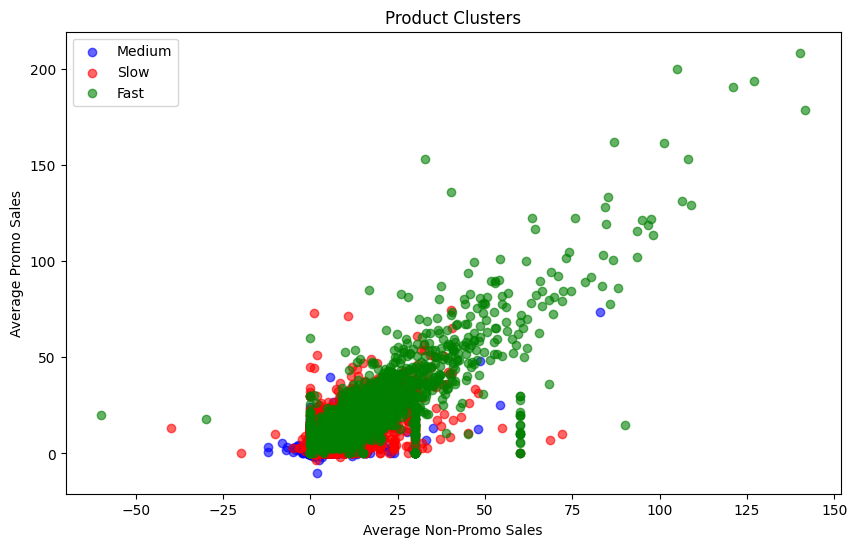

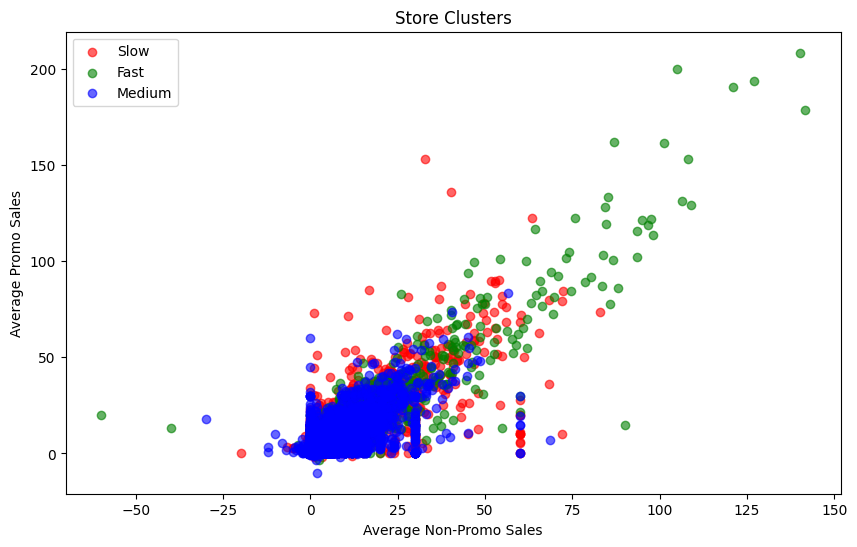

   ProductCode  AvgNonPromoSales Cluster
0            1          2.642734  Medium
1            2          2.261413  Medium
2            3          2.254218  Medium
3            4          2.394042  Medium
4            5          2.322108  Medium
   StoreCode  AvgNonPromoSales Cluster
0          1          2.558387    Slow
1          2          5.163590    Fast
2          3          2.102084  Medium
3          4          2.302293  Medium
4          5          2.238907  Medium


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset with promotional flags
sales_data = pd.read_csv('/assignment4.1a_with_promotional_flag.csv')

# Convert date column to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')

# Create weekly sales aggregation
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week
weekly_sales = sales_data.groupby(['ProductCode', 'StoreCode', 'Week', 'PromotionalFlag'])['SalesQuantity'].sum().reset_index()

# Separate the data into promotional (flag = 1) and non-promotional periods (flag = 0)
non_promo_sales = weekly_sales[weekly_sales['PromotionalFlag'] == 0]
promo_sales = weekly_sales[weekly_sales['PromotionalFlag'] == 1]

# Calculate the average weekly sales for non-promotion periods
avg_non_promo_sales = non_promo_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()
avg_non_promo_sales.columns = ['ProductCode', 'StoreCode', 'AvgNonPromoSales']

# Calculate the average weekly sales for promotion periods (flag = 1)
avg_promo_sales = promo_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()
avg_promo_sales.columns = ['ProductCode', 'StoreCode', 'AvgPromoSales']

# Merge the average sales data
avg_sales = avg_non_promo_sales.merge(avg_promo_sales, on=['ProductCode', 'StoreCode'], how='left')

# Replace NaN values with 0 (since there might be StoreProductCodes that don't have sales in promotion period)
avg_sales = avg_sales.fillna(0)

# Calculate the effect of promotion in percentage form
avg_sales['SalesIncreasePercentage'] = ((avg_sales['AvgPromoSales'] - avg_sales['AvgNonPromoSales']) / avg_sales['AvgNonPromoSales']) * 100

# Cluster products based on average weekly sales during non-promotion periods
product_avg_sales = avg_sales.groupby('ProductCode')['AvgNonPromoSales'].mean().reset_index()
kmeans_product = KMeans(n_clusters=3, random_state=42)
product_avg_sales['Cluster'] = kmeans_product.fit_predict(product_avg_sales[['AvgNonPromoSales']])
product_avg_sales['Cluster'] = product_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

# Cluster stores based on average weekly sales during non-promotion periods
store_avg_sales = avg_sales.groupby('StoreCode')['AvgNonPromoSales'].mean().reset_index()
kmeans_store = KMeans(n_clusters=3, random_state=42)
store_avg_sales['Cluster'] = kmeans_store.fit_predict(store_avg_sales[['AvgNonPromoSales']])
store_avg_sales['Cluster'] = store_avg_sales['Cluster'].map({0: 'Slow', 1: 'Medium', 2: 'Fast'})

# Merge cluster information back into avg_sales
avg_sales = avg_sales.merge(product_avg_sales[['ProductCode', 'Cluster']], on='ProductCode', how='left')
avg_sales.rename(columns={'Cluster': 'Cluster_Product'}, inplace=True)
avg_sales = avg_sales.merge(store_avg_sales[['StoreCode', 'Cluster']], on='StoreCode', how='left')
avg_sales.rename(columns={'Cluster': 'Cluster_Store'}, inplace=True)

# Calculate sales increase by product and store clusters
product_cluster_effect = avg_sales.groupby('Cluster_Product')['SalesIncreasePercentage'].mean()
store_cluster_effect = avg_sales.groupby('Cluster_Store')['SalesIncreasePercentage'].mean()

print("Sales Increase Percentage by Product Cluster:")
print(product_cluster_effect)

print("\nSales Increase Percentage by Store Cluster:")
print(store_cluster_effect)

# Visualization
def plot_clusters(data, cluster_column, title, xlabel, ylabel):
    unique_clusters = data[cluster_column].unique()
    colors = {'Slow': 'red', 'Medium': 'blue', 'Fast': 'green'}

    plt.figure(figsize=(10, 6))
    for cluster in unique_clusters:
        clustered_data = data[data[cluster_column] == cluster]
        plt.scatter(clustered_data['AvgNonPromoSales'], clustered_data['AvgPromoSales'],
                    color=colors[cluster], label=cluster, alpha=0.6)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend()
    plt.show()

# Plot clusters for products
plot_clusters(avg_sales, 'Cluster_Product', 'Product Clusters', 'Average Non-Promo Sales', 'Average Promo Sales')

# Plot clusters for stores
plot_clusters(avg_sales, 'Cluster_Store', 'Store Clusters', 'Average Non-Promo Sales', 'Average Promo Sales')

# Display the clusters
print(product_avg_sales.head())
print(store_avg_sales.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     ProductCode  SalesQuantity  Cluster
0              1       1.918387        2
1              2       1.702871        2
2              3       1.584558        2
3              4       1.693642        2
4              5       1.701154        2
..           ...            ...      ...
311          313       2.040575        2
312          314       0.719431        0
313          315       0.434875        0
314          316       0.505890        0
315          317       0.340827        0

[316 rows x 3 columns]


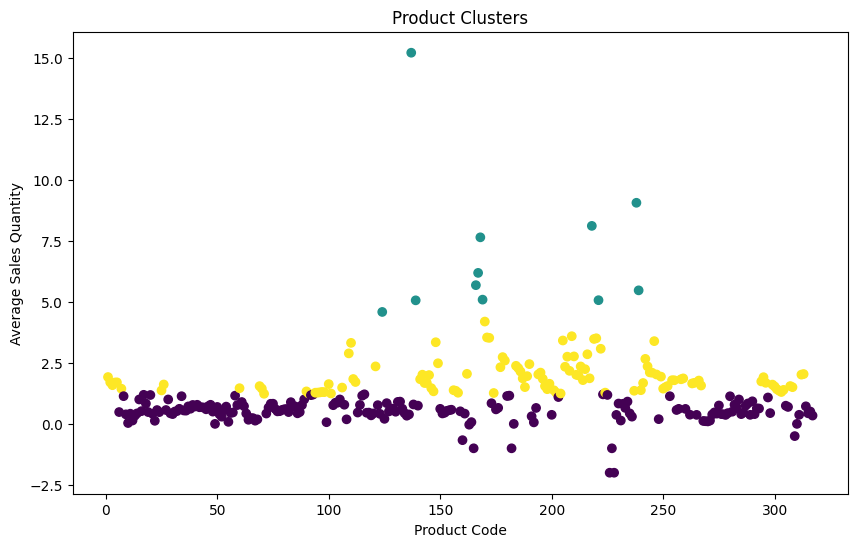

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


     StoreCode  SalesQuantity  Cluster
0            1       1.594803        1
1            2       2.029261        1
2            3       1.285126        0
3            4       1.467944        0
4            5       1.442343        0
..         ...            ...      ...
335        336       1.333010        0
336        337       1.383420        0
337        338       1.365211        0
338        339       1.426147        0
339        340       1.498969        0

[340 rows x 3 columns]


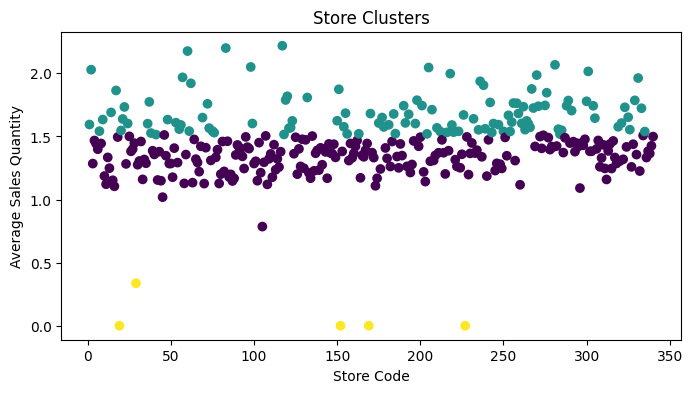

In [ ]:
# Defining promotion periods (for the first 4 promotions)
promo_periods = [
    (pd.to_datetime('2015-02-10'), pd.to_datetime('2015-02-17')),
    (pd.to_datetime('2015-03-15'), pd.to_datetime('2015-03-22')),
    (pd.to_datetime('2015-05-24'), pd.to_datetime('2015-06-01')),
    (pd.to_datetime('2015-06-21'), pd.to_datetime('2015-06-28'))
]

# Filtering non-promotion periods
non_promo_sales = pd.concat(
    [sales_data[(sales_data['Date'] >= start) & (sales_data['Date'] <= end)] for start, end in non_promo_periods]
)

# Calculating average sales per product and store
avg_sales = non_promo_sales.groupby(['ProductCode', 'StoreCode'])['SalesQuantity'].mean().reset_index()

# Reshaping data for clustering (byproduct)
product_avg_sales = avg_sales.groupby('ProductCode')['SalesQuantity'].mean().reset_index()

# Applying KMeans clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(product_avg_sales[['SalesQuantity']])
product_avg_sales['Cluster'] = kmeans.labels_

# Displaying the cluster assignment
print(product_avg_sales)

# Ploting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(product_avg_sales['ProductCode'], product_avg_sales['SalesQuantity'], c=product_avg_sales['Cluster'], cmap='viridis')
plt.title('Product Clusters')
plt.xlabel('Product Code')
plt.ylabel('Average Sales Quantity')
plt.show()

# Reshaping the data for clustering (by store)
store_avg_sales = avg_sales.groupby('StoreCode')['SalesQuantity'].mean().reset_index()

# Applying KMeans clustering
kmeans_store = KMeans(n_clusters=3)
kmeans_store.fit(store_avg_sales[['SalesQuantity']])
store_avg_sales['Cluster'] = kmeans_store.labels_

# Displaying the cluster assignment
print(store_avg_sales)

# Plotting the clusters
plt.figure(figsize=(8, 4))
plt.scatter(store_avg_sales['StoreCode'], store_avg_sales['SalesQuantity'], c=store_avg_sales['Cluster'], cmap='viridis')
plt.title('Store Clusters')
plt.xlabel('Store Code')
plt.ylabel('Average Sales Quantity')
plt.show()

   ProductCode  SalesQuantity Cluster
0            1       3.556351  Medium
1            2       3.040171    Slow
2            3       2.375115    Slow
3            4       2.908422    Slow
4            5       2.812316    Slow
   StoreCode  SalesQuantity Cluster
0          1       3.343216  Medium
1          2       8.146200    Fast
2          3       2.719727    Slow
3          4       3.522735  Medium
4          5       2.894218    Slow


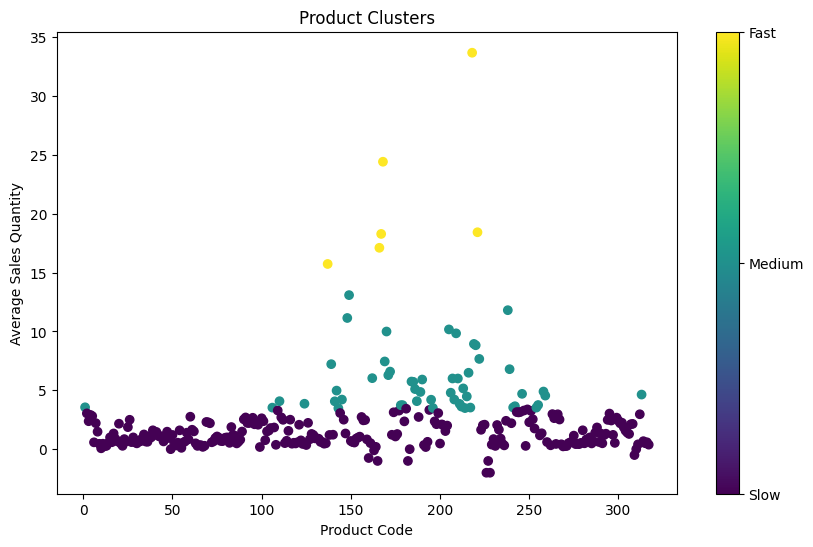

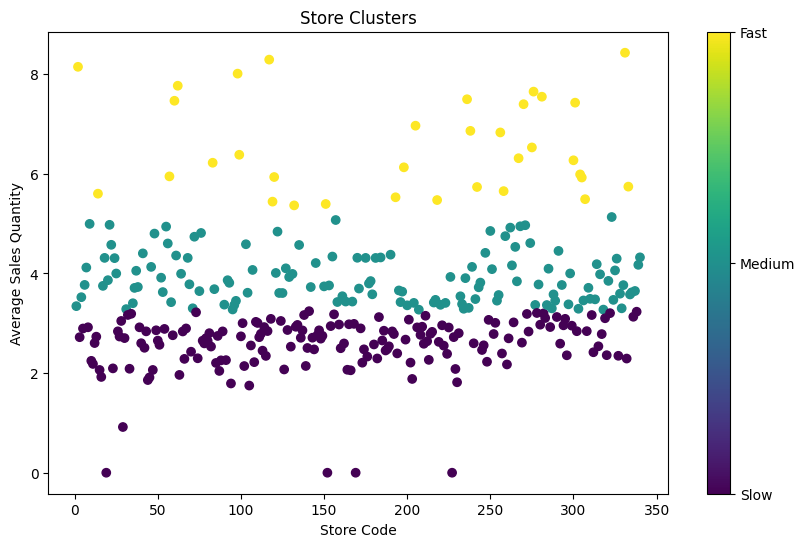

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Convert date columns to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'])
promotion_dates['StartDate'] = pd.to_datetime(promotion_dates['StartDate'])
promotion_dates['EndDate'] = pd.to_datetime(promotion_dates['EndDate'])

# Define promotion periods (for the first 4 promotions)
promo_periods = [
    (pd.to_datetime('2015-02-10'), pd.to_datetime('2015-02-17')),
    (pd.to_datetime('2015-03-15'), pd.to_datetime('2015-03-22')),
    (pd.to_datetime('2015-05-24'), pd.to_datetime('2015-06-01')),
    (pd.to_datetime('2015-06-21'), pd.to_datetime('2015-06-28'))
]

# Define non-promotion periods (before and between the first 4 promotions)
non_promo_periods = [
    (pd.to_datetime('2015-01-01'), pd.to_datetime('2015-02-09')),
    (pd.to_datetime('2015-02-18'), pd.to_datetime('2015-03-14')),
    (pd.to_datetime('2015-03-23'), pd.to_datetime('2015-05-23')),
    (pd.to_datetime('2015-06-02'), pd.to_datetime('2015-06-20')),
    (pd.to_datetime('2015-06-29'), pd.to_datetime('2015-08-01'))
]

# Filter sales data for non-promotion periods
non_promo_sales = pd.concat(
    [sales_data[(sales_data['Date'] >= start) & (sales_data['Date'] <= end)] for start, end in non_promo_periods]
)

# Calculate weekly sales
non_promo_sales['Week'] = non_promo_sales['Date'].dt.isocalendar().week

# Aggregate weekly sales
weekly_non_promo_sales = non_promo_sales.groupby(['ProductCode', 'StoreCode', 'Week'])['SalesQuantity'].sum().reset_index()

# Calculate average weekly sales per product during non-promotion periods
avg_weekly_product_sales = weekly_non_promo_sales.groupby('ProductCode')['SalesQuantity'].mean().reset_index()

# Calculate average weekly sales per store during non-promotion periods
avg_weekly_store_sales = weekly_non_promo_sales.groupby('StoreCode')['SalesQuantity'].mean().reset_index()

# Apply KMeans clustering for products
kmeans_product = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_product.fit(avg_weekly_product_sales[['SalesQuantity']])
avg_weekly_product_sales['Cluster'] = kmeans_product.labels_

# Map cluster labels to 'Slow', 'Medium', 'Fast'
cluster_centers = kmeans_product.cluster_centers_.flatten()
sorted_indices = np.argsort(cluster_centers)
cluster_mapping = {sorted_indices[0]: 'Slow', sorted_indices[1]: 'Medium', sorted_indices[2]: 'Fast'}
avg_weekly_product_sales['Cluster'] = avg_weekly_product_sales['Cluster'].map(cluster_mapping)

# Display the cluster assignment
print(avg_weekly_product_sales.head())

# Apply KMeans clustering for stores
kmeans_store = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_store.fit(avg_weekly_store_sales[['SalesQuantity']])
avg_weekly_store_sales['Cluster'] = kmeans_store.labels_

# Map cluster labels to 'Slow', 'Medium', 'Fast'
cluster_centers = kmeans_store.cluster_centers_.flatten()
sorted_indices = np.argsort(cluster_centers)
cluster_mapping = {sorted_indices[0]: 'Slow', sorted_indices[1]: 'Medium', sorted_indices[2]: 'Fast'}
avg_weekly_store_sales['Cluster'] = avg_weekly_store_sales['Cluster'].map(cluster_mapping)

# Display the cluster assignment
print(avg_weekly_store_sales.head())

# Visualize the clustering results
# Plot for product clusters
plt.figure(figsize=(10, 6))
plt.scatter(avg_weekly_product_sales['ProductCode'], avg_weekly_product_sales['SalesQuantity'], c=avg_weekly_product_sales['Cluster'].apply(lambda x: {'Slow': 0, 'Medium': 1, 'Fast': 2}[x]), cmap='viridis')
plt.title('Product Clusters')
plt.xlabel('Product Code')
plt.ylabel('Average Sales Quantity')
plt.colorbar(ticks=[0, 1, 2], format=plt.FuncFormatter(lambda val, loc: ['Slow', 'Medium', 'Fast'][loc]))
plt.show()

# Plot for store clusters
plt.figure(figsize=(10, 6))
plt.scatter(avg_weekly_store_sales['StoreCode'], avg_weekly_store_sales['SalesQuantity'], c=avg_weekly_store_sales['Cluster'].apply(lambda x: {'Slow': 0, 'Medium': 1, 'Fast': 2}[x]), cmap='viridis')
plt.title('Store Clusters')
plt.xlabel('Store Code')
plt.ylabel('Average Sales Quantity')
plt.colorbar(ticks=[0, 1, 2], format=plt.FuncFormatter(lambda val, loc: ['Slow', 'Medium', 'Fast'][loc]))
plt.show()